# ECE6530 (DSP) Group 3 Project
## Lab P-9: Sampling, Convolution, and FIR Filtering

### Group Members: Rick, Grant Brown, Thomas Warren

In [1]:
#Load the required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math as m
from lab9_defs import *
import utils

#### 3.1 - Deconvolution Experiment for 1-D Filters
##### Use the function \textit{firfilt( )} to implement the following FIR filter
##### $ w[n] = x[n] - 0.9x[n-1]$
##### on the input signal x[n] defined via the MATLAB statement: xx = 256*(rem(0:100,50)<10); In MATLAB you must define the vector of filter coefficients bb needed in firfilt.

##### (a) Plot both the input and output waveforms x[n] and w[n] on the same figure, using subplot. Make the discrete-time signal plots with MATLAB’s stem function, but restrict the horizontal axis to the range $0 \leq n \leq 75$. Explain why the output appears the way it does by figuring out (mathematically) the effect of the filter coefficients in (3).

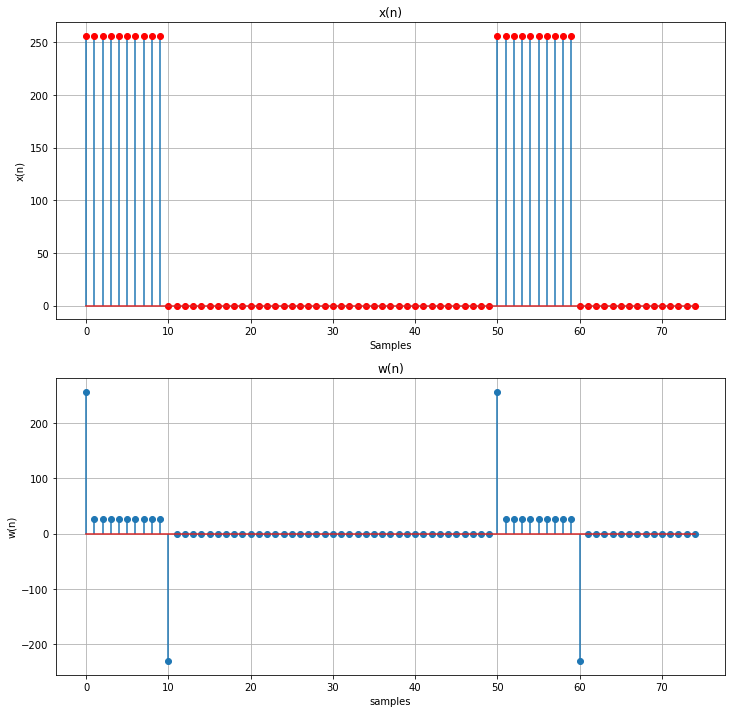

In [2]:
x_n = 256*((np.arange(0,101,1)%50)<10)
n = np.arange(0,100)
w_n = compute_fir_filter_output(x_n)
fig, axs = plt.subplots(2,1, figsize = (12,12))
axs[0].stem(n[0:75],x_n[0:75], markerfmt = 'red')
axs[0].title.set_text("x(n)")
axs[0].grid()
axs[0].set_ylabel("x(n)")
axs[0].set_xlabel("Samples")
axs[1].stem(n[0:75],w_n[0:75])
axs[1].title.set_text("w(n)")
axs[1].set_ylabel("w(n)")
axs[1].set_xlabel("samples")
axs[1].grid()

##### (b) Note that w[n] and x[n] are not the same length. Determine the length of the filtered signal w[n], and explain how its length is related to the length of x[n] and the length of the FIR filter. (If you need a hint refer to Section 1.2.)

##### The FIR filter in this example has coefficients bb = [1 0.9], so it is length 2. The output of the convolution can be determined by the length of the two sequences given as inputs to the convolution operation, which in this case would be:
##### $length(w[n]) = length(x[n]) + length(bb) -1 = 101 + 2 - 1 = 102$

#### 3.1.1 Restoration Filter

##### The following FIR filter:
##### $y[n] = \sum_{l=0}^{M} r^l w[n-l]$
##### can be use to undo the effects of the FIR filter in the previous section (see the block diagram in Fig. 3). It performs restoration, but it only does this approximately. Use the following steps to show how well it works when r = 0:9 and M = 22.

##### (a) Process the signal w[n] from (3) with FILTER-2 to obtain the output signal y[n].
##### (b) Make stem plots of w[n] and y[n] using a time-index axis n that is the same for both signals. Put the stem plots in the same window for comparison—using a two-panel subplot.

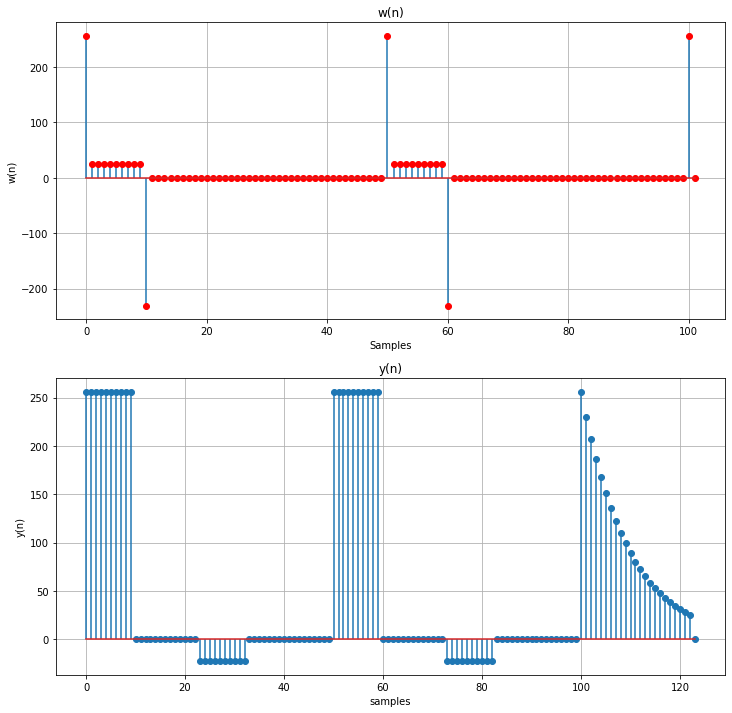

In [3]:
M=22
l=np.arange(0, M+1, dtype=np.int8)
r = [0.9**l_value for l_value in l]
y = np.convolve(r, w_n)

fig, axs = plt.subplots(2,1, figsize = (12,12))
axs[0].stem(w_n, markerfmt = 'red')
axs[0].title.set_text("w(n)")
axs[0].grid()
axs[0].set_ylabel("w(n)")
axs[0].set_xlabel("Samples")
axs[1].stem(y)
axs[1].title.set_text("y(n)")
axs[1].set_ylabel("y(n)")
axs[1].set_xlabel("samples")
axs[1].grid()

##### (c) Since the objective of the restoration filter is to produce a y[n] that is almost identical to x[n], make a plot of the error (difference) between x[n] and y[n] over the range $0 < n < 50$.

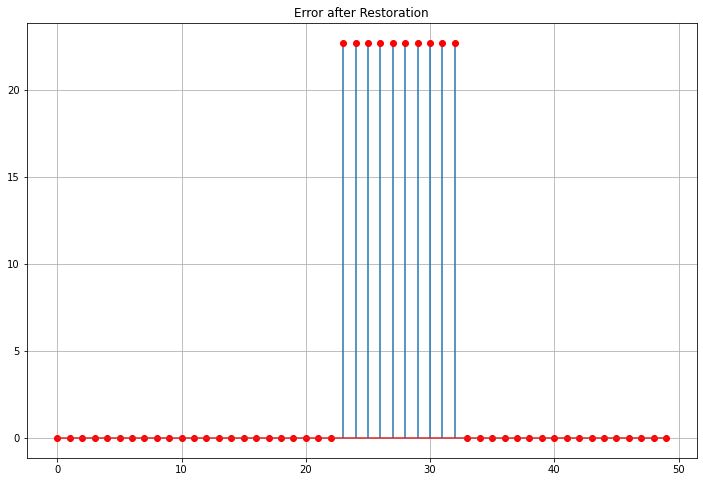

In [7]:
error = np.zeros(50)
for i in range(0, 50):
    error[i] = np.absolute(y[i] - x_n[i])
fig, ax = plt.subplots(1,1, figsize = (12,8))
ax.stem(error, markerfmt = 'red')
ax.title.set_text("Error after Restoration")
ax.grid()

#### 3.1.2 - Worst-Case Error
##### (a) Evaluate the worst-case error by doing the following: use MATLAB’s max() function to find the maximum of the difference between y[n] and x[n] in the range $0 < n < 50$.

##### (b) What does the error plot and worst case error tell you about the quality of the restoration of x[n]? How small do you think the worst case error has to be so that it cannot be seen on a plot?

In [8]:
max_error = np.max(error[0:50])
print(f"Maximum Error found is {max_error}")

Maximum Error found is 22.689121586310428


#### 3.1.3 - An Echo Filter
##### The following FIR filter can be interpreted as an echo filter.
##### $y_1[n] = x_1[n] + rx_1[n-P]$
##### Explain why this is a valid interpretation by working out the following:
##### (a) You have an audio signal sampled at $f_s = 8000 Hz$ and you would like to add a delayed version of the signal to simulate an echo. The time delay of the echo should be 0.2 seconds, and the strength of the echo should be 90% percent of the original. Determine the values of r and P in (4); make P an integer.

##### To solve this we must known how many samples we are offsetting by with the 0.2 seconds of delay. Since we are sampling at 8000 Hz which is 8000 samples/sec, then we are offsetting by: $8000 samples/sec * 0.2 sec = 1600 samples$. Therefore, P should be 1600. Since the signal should be at 90% of its value then r should be 0.9. Giving the echo filter equation:
##### $y_1[n] = x_1[n] + 0.9*x_1[n-1600]$